# Import libraries

In [ ]:
## Import libraries

import os
import datetime
import time

!pip install pyts
from pyts.datasets import load_gunpoint
from pyts.image import RecurrencePlot
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField

import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Model, Sequential
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.backend as K
from PIL import Image
from dateutil.parser import parse
from typing import List
import seaborn as sns
import torch
from torch import optim
import torch.nn as nn
#!pip install -q keras-tcn --no-dependencies
#from tcn import TCN, tcn_full_summary


# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Permute
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteError
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError

from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, SimpleRNN, LSTMCell, MaxPooling1D, Flatten, RepeatVector, GRU, Input

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

!pip install tab2img
from tab2img.converter import Tab2Img

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.4 MB/s eta 0:00:00
Mounted at /content/drive


# Read CSV file

In [ ]:
df_path = '/content/drive/MyDrive/1min.csv'

# Load CSV file into a Pandas DataFrame
df = pd.read_csv(df_path)

In [ ]:
# view summary statistics of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNIX_sec,118123.0,1.529520e+09,1.048954e+07,1.512747e+09,1.519246e+09,1.529882e+09,1.537639e+09,1.548025e+09
ElevationAngle,118123.0,3.671553e+01,1.555254e+01,1.500000e+01,2.526883e+01,3.226930e+01,4.540940e+01,7.836703e+01
AzimuthAngle,118123.0,1.798533e+02,5.399173e+01,7.162534e+01,1.377247e+02,1.798011e+02,2.220086e+02,2.883586e+02
GSI_W/m^2,118123.0,4.997303e+02,2.480852e+02,9.481026e+00,3.054564e+02,4.883511e+02,6.707411e+02,1.263227e+03
Temperature_◦C,118123.0,1.721917e+01,1.019556e+01,-5.225932e+00,8.625206e+00,1.561113e+01,2.626812e+01,3.812885e+01
DewPoint_◦C,118123.0,-1.651166e+00,9.106979e+00,-3.527766e+01,-8.388889e+00,-2.994168e+00,5.422562e+00,1.727000e+01
AtmosphericPressure_mmHg,118123.0,7.652546e+02,4.056089e+00,7.503160e+02,7.627620e+02,7.655560e+02,7.678927e+02,7.767320e+02
WindDirection_radians,118123.0,3.517959e+00,1.309987e+00,0.000000e+00,2.705591e+00,3.703665e+00,4.356675e+00,6.265732e+00
WindVelocity_mile/s,118123.0,2.000713e+00,2.347106e+00,0.000000e+00,4.023360e-01,1.296416e+00,2.683143e+00,2.324419e+01
RelativeHumidity_%,118123.0,3.310109e+01,1.866100e+01,1.000000e+00,1.852584e+01,3.000000e+01,4.400000e+01,9.500000e+01


In [ ]:
# view info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118123 entries, 0 to 118122
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UNIX_sec                  118123 non-null  float64
 1   ElevationAngle            118123 non-null  float64
 2   AzimuthAngle              118123 non-null  float64
 3   GSI_W/m^2                 118123 non-null  float64
 4   Temperature_◦C            118123 non-null  float64
 5   DewPoint_◦C               118123 non-null  float64
 6   AtmosphericPressure_mmHg  118123 non-null  float64
 7   WindDirection_radians     118123 non-null  float64
 8   WindVelocity_mile/s       118123 non-null  float64
 9   RelativeHumidity_%        118123 non-null  float64
 10  readable_datetime         118123 non-null  object 
dtypes: float64(10), object(1)
memory usage: 9.9+ MB


In [ ]:
df.shape

(118123, 11)

In [ ]:
# """
#     Optional stratified sampling. This was only done because the device
#     being used could not handle computation of the entire dataset.
# """

# # Sample a subset of the DataFrame
# sample_size = 500  # Number of rows to sample
# df = df.sample(n=sample_size)

In [ ]:
# df.shape

## Preprocess dataframe

In [ ]:
# sub-set of columns to be used for model training
df = df[['ElevationAngle', 'AzimuthAngle', 'GSI_W/m^2',
        'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
        'WindDirection_radians', 'WindVelocity_mile/s', 'RelativeHumidity_%',
        'readable_datetime']]

# change readable_datetime to datetime64 data type
df['readable_datetime'] = pd.to_datetime(df['readable_datetime'], infer_datetime_format=True)

# set readable_datetime as row index
df.set_index(df.readable_datetime,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118123 entries, 2017-12-08 08:36:04 to 2019-01-20 15:50:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ElevationAngle            118123 non-null  float64       
 1   AzimuthAngle              118123 non-null  float64       
 2   GSI_W/m^2                 118123 non-null  float64       
 3   Temperature_◦C            118123 non-null  float64       
 4   DewPoint_◦C               118123 non-null  float64       
 5   AtmosphericPressure_mmHg  118123 non-null  float64       
 6   WindDirection_radians     118123 non-null  float64       
 7   WindVelocity_mile/s       118123 non-null  float64       
 8   RelativeHumidity_%        118123 non-null  float64       
 9   readable_datetime         118123 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 9.9 MB


<ipython-input-8-356076076af2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readable_datetime'] = pd.to_datetime(df['readable_datetime'], infer_datetime_format=True)


## Feature engineering

AzimuthAngle & ElevationAngle are given in units of degrees while WindDirection_radians is given in radians. Angles do not make good model inputs: 360° and 0° should be close to each other and wrap around smoothly. Therefore, You can replace every periodic feature x with two features cos(x) and sin(x) after normalizing to radians. By expressing your feature as 2 dimensions, instead of one you can easily avoid this problem - simply push it through cosine and sine, this way you change your angle into a point on a unit circle. Since these AzimuthAngle & ElevationAngle are your target variable you will then have 4 target variables with respect to cos(y) and sin(y). (NOTE: Look for some research supporting this and cite it)

In [ ]:
# Convert to radians.
df['ElevationAngle_rad'] = df['ElevationAngle']*np.pi / 180
df['AzimuthAngle_rad'] = df['AzimuthAngle']*np.pi / 180

In [ ]:
# Calculate the wind x and y components.
df['ElevationAngle_cos'] = np.cos(df['ElevationAngle_rad'])
df['ElevationAngle_sin'] = np.sin(df['ElevationAngle_rad'])
df['AzimuthAngle_sin'] = np.cos(df['AzimuthAngle_rad'])
df['AzimuthAngle_cos'] = np.sin(df['AzimuthAngle_rad'])
df['WindDirection_radians_cos'] = np.cos(df['WindDirection_radians'])
df['WindDirection_radians_sin'] = np.sin(df['WindDirection_radians'])

In [ ]:
df.head()

,ElevationAngle,AzimuthAngle,GSI_W/m^2,Temperature_◦C,DewPoint_◦C,AtmosphericPressure_mmHg,WindDirection_radians,WindVelocity_mile/s,RelativeHumidity_%,readable_datetime,ElevationAngle_rad,AzimuthAngle_rad,ElevationAngle_cos,ElevationAngle_sin,AzimuthAngle_sin,AzimuthAngle_cos,WindDirection_radians_cos,WindDirection_radians_sin
readable_datetime,,,,,,,,,,,,,,,,,,
2017-12-08 08:36:04,15.000023,132.825735,247.350955,-1.412616,-10.952546,770.073760,1.909132,0.507345,48.213543,2017-12-08 08:36:04,0.261800,2.318246,0.965926,0.258819,-0.679771,0.733425,-0.331917,0.943309
2017-12-08 08:37:00,15.137937,132.992499,247.783427,-1.401186,-10.975406,770.099889,2.149721,0.456758,48.110672,2017-12-08 08:37:00,0.264207,2.321157,0.965300,0.261144,-0.681903,0.731443,-0.547124,0.837052
2017-12-08 08:38:00,15.286575,133.173234,251.524191,-1.388961,-11.000060,770.128000,2.408999,0.402635,48.000000,2017-12-08 08:38:00,0.266801,2.324311,0.964619,0.263647,-0.684206,0.729288,-0.743443,0.668800
2017-12-08 08:39:00,15.434081,133.353636,252.733730,-1.404770,-11.013234,770.128000,2.506673,0.468360,48.000000,2017-12-08 08:39:00,0.269376,2.327460,0.963937,0.266130,-0.686499,0.727130,-0.805120,0.593113
2017-12-08 08:40:00,15.581838,133.535402,255.725885,-1.420652,-11.026469,770.128000,2.604800,0.534389,48.000000,2017-12-08 08:40:00,0.271954,2.330632,0.963248,0.268614,-0.688803,0.724949,-0.859353,0.511382


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118123 entries, 2017-12-08 08:36:04 to 2019-01-20 15:50:00
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ElevationAngle             118123 non-null  float64       
 1   AzimuthAngle               118123 non-null  float64       
 2   GSI_W/m^2                  118123 non-null  float64       
 3   Temperature_◦C             118123 non-null  float64       
 4   DewPoint_◦C                118123 non-null  float64       
 5   AtmosphericPressure_mmHg   118123 non-null  float64       
 6   WindDirection_radians      118123 non-null  float64       
 7   WindVelocity_mile/s        118123 non-null  float64       
 8   RelativeHumidity_%         118123 non-null  float64       
 9   readable_datetime          118123 non-null  datetime64[ns]
 10  ElevationAngle_rad         118123 non-null  float64       
 11  AzimuthAngle_rad  

In [ ]:
df = df[['readable_datetime', 'ElevationAngle_cos', 'ElevationAngle_sin',
         'WindDirection_radians_cos', 'WindDirection_radians_sin', 'GSI_W/m^2', 'Temperature_◦C',
         'DewPoint_◦C', 'AtmosphericPressure_mmHg', 'WindVelocity_mile/s', 'RelativeHumidity_%']]

#### Time

Similarly, the Date Time column is very useful, but not in this string form. Start by converting it to seconds:

In [ ]:
# save date_time object from readable_datetime with specified format
date_time = pd.to_datetime(df.pop('readable_datetime'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
# cocnvert date_time object to seconds and save in dataframe
df['timestamp_s'] = date_time.map(pd.Timestamp.timestamp)

Similar to the other angle features, the time in seconds is not a useful model input. Being weather data, it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.

You can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals:

In [ ]:
day = 24*60*60
week = 24*60*60*7
month = 24*60*60*30
year = (365.2425)*day

df['Day sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / day))
df['Day cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / day))
df['Week sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / week))
df['Week cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / week))
df['Month sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / month))
df['Month cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / month))
df['Year sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / year))
df['Year cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / year))

In [ ]:
df.head(2)

,ElevationAngle_cos,ElevationAngle_sin,WindDirection_radians_cos,WindDirection_radians_sin,GSI_W/m^2,Temperature_◦C,DewPoint_◦C,AtmosphericPressure_mmHg,WindVelocity_mile/s,RelativeHumidity_%,timestamp_s,Day sin,Day cos,Week sin,Week cos,Month sin,Month cos,Year sin,Year cos
readable_datetime,,,,,,,,,,,,,,,,,,,
2017-12-08 08:36:04,0.965926,0.258819,-0.331917,0.943309,247.350955,-1.412616,-10.952546,770.073760,0.507345,48.213543,1.512722e+09,0.776963,-0.629546,0.938851,0.344323,-0.646797,-0.762662,-0.389887,0.920863
2017-12-08 08:37:00,0.965300,0.261144,-0.547124,0.837052,247.783427,-1.401186,-10.975406,770.099889,0.456758,48.110672,1.512722e+09,0.774393,-0.632705,0.939051,0.343777,-0.646901,-0.762574,-0.389876,0.920867


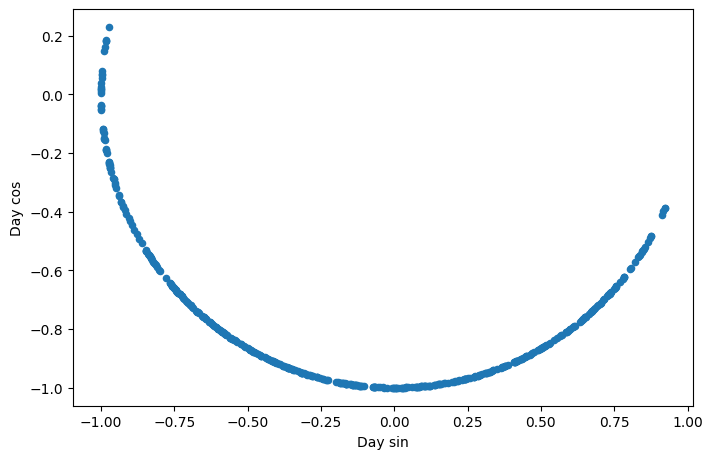

In [ ]:
df.sample(500).plot.scatter('Day sin', 'Day cos').set_aspect('equal')

In [ ]:
#plt.plot(np.array(df['Day sin'])[:5000])
#plt.plot(np.array(df['Day cos'])[:5000])
#plt.xlabel('Time [h]')
#plt.title('Time of day signal')

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

#### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling.
The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.
It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

In [ ]:
df = df[['ElevationAngle_cos', 'ElevationAngle_sin',
         'WindDirection_radians_cos', 'WindDirection_radians_sin',
         'GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
         'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
         'RelativeHumidity_%','Day sin', 'Day cos',
         'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]

In [ ]:
# # split data into train, validation, and test sets
# column_indices = {name: i for i, name in enumerate(df.columns)}

# # Split 70:20:10 (train:validation:test)
# n = len(df)
# train_df = df[0:int(n*0.7)]
# val_df = df[int(n*0.7):int(n*0.9)]
# test_df = df[int(n*0.9):]


# y_train = train_df[['ElevationAngle_cos','ElevationAngle_sin']]
# y_test = test_df[['ElevationAngle_cos','ElevationAngle_sin']]
# y_val = val_df[['ElevationAngle_cos', 'ElevationAngle_sin']]
# train_df = train_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
#                     'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
#                     'RelativeHumidity_%','Day sin', 'Day cos',
#                     'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]
# val_df = val_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
#                   'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
#                   'RelativeHumidity_%','Day sin', 'Day cos',
#                   'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]
# test_df = test_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
#                 'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
#                 'RelativeHumidity_%','Day sin', 'Day cos',
#                 'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]

# #num_features = df.shape[1]

In [ ]:
# Define the normalization methods
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np
import pandas as pd
import itertools

import numpy as np

def unit_vector_scaling(train, val, test):
    train_norm = np.sqrt(np.power(train, 2).sum(axis=1))
    train_norm[train_norm == 0] = 1  # Set zero norms to 1 to avoid division by zero
    train_scaled = train / train_norm[:, np.newaxis]  # Element-wise division using /

    val_norm = np.sqrt(np.power(val, 2).sum(axis=1))
    val_norm[val_norm == 0] = 1
    val_scaled = val / val_norm[:, np.newaxis]

    test_norm = np.sqrt(np.power(test, 2).sum(axis=1))
    test_norm[test_norm == 0] = 1
    test_scaled = test / test_norm[:, np.newaxis]

    return train_scaled, val_scaled, test_scaled

# def log_transformation(train, val, test):
#     train_log = np.log1p(train)
#     val_log = np.log1p(val)
#     test_log = np.log1p(test)
#     return train_log, val_log, test_log

def min_max_scaling(train, val, test):
    # Clip extreme values
    clip_value = 1e9
    train = np.clip(train, -clip_value, clip_value)
    val = np.clip(val, -clip_value, clip_value)
    test = np.clip(test, -clip_value, clip_value)

    # Apply MinMaxScaler
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    test_scaled = scaler.transform(test)

    return train_scaled, val_scaled, test_scaled

def decimal_scaling(train, val, test):
    max_abs_val = np.max(np.abs(train))
    scaling_factor = 10 ** np.ceil(np.log10(max_abs_val))
    train_scaled = train / scaling_factor
    val_scaled = val / scaling_factor
    test_scaled = test / scaling_factor
    return train_scaled, val_scaled, test_scaled

def z_score_scaling(train, val, test):
    # Clip extreme values
    clip_value = 1e9
    train = np.clip(train, -clip_value, clip_value)
    val = np.clip(val, -clip_value, clip_value)
    test = np.clip(test, -clip_value, clip_value)

    # Apply StandardScaler
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    test_scaled = scaler.transform(test)

    return train_scaled, val_scaled, test_scaled

def median_scaling(train, val, test):
    median = np.median(train)
    train_scaled = train - median
    val_scaled = val - median
    test_scaled = test - median
    return train_scaled, val_scaled, test_scaled

def sigmoid_transformation(train, val, test):
    train_scaled = 1 / (1 + np.exp(-train))
    val_scaled = 1 / (1 + np.exp(-val))
    test_scaled = 1 / (1 + np.exp(-test))
    return train_scaled, val_scaled, test_scaled

def median_mad_scaling(train, val, test):
    median = np.median(train)
    mad = np.median(np.abs(train - median))
    train_scaled = (train - median) / mad
    val_scaled = (val - median) / mad
    test_scaled = (test - median) / mad
    return train_scaled, val_scaled, test_scaled

def tanh_scaling(train, val, test):
    train_scaled = np.tanh(train)
    val_scaled = np.tanh(val)
    test_scaled = np.tanh(test)
    return train_scaled, val_scaled, test_scaled

def pareto_scaling(train, val, test):
    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)
    train_scaled = (train - mean) / np.sqrt(std)
    val_scaled = (val - mean) / np.sqrt(std)
    test_scaled = (test - mean) / np.sqrt(std)
    return train_scaled, val_scaled, test_scaled

def variable_stability_scaling(train, val, test):
    median = np.median(train, axis=0)
    mad = np.median(np.abs(train - median), axis=0)
    mad[mad == 0] = 1  # Set zero MAD values to 1 to avoid division by zero
    train_scaled = (train - median) / mad
    val_scaled = (val - median) / mad
    test_scaled = (test - median) / mad
    return train_scaled, val_scaled, test_scaled

# Add handling for NaN values
def handle_nan_values(data):
    if data.isnull().any().any():
        # Replace NaN values with mean or median
        data = data.fillna(data.mean())
    return data

# Load and split the data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_df = df[0:int(n * 0.7)]
val_df = df[int(n * 0.7):int(n * 0.9)]
test_df = df[int(n * 0.9):]

y_train = train_df[['ElevationAngle_cos','ElevationAngle_sin']].to_numpy()
y_test = test_df[['ElevationAngle_cos','ElevationAngle_sin']].to_numpy()
y_val = val_df[['ElevationAngle_cos', 'ElevationAngle_sin']].to_numpy()
train_df = train_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]
val_df = val_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]
test_df = test_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]

# List of normalization methods
# normalization_methods = [
#     unit_vector_scaling,
#     min_max_scaling,
#     decimal_scaling,
#     z_score_scaling,
#     median_scaling,
#     sigmoid_transformation,
#     median_mad_scaling,
#     tanh_scaling,
#     pareto_scaling,
#     variable_stability_scaling
# ]

normalization_methods = [
    unit_vector_scaling,
    min_max_scaling,
    z_score_scaling,
    median_scaling,
    sigmoid_transformation,
    median_mad_scaling,
    tanh_scaling,
    pareto_scaling,
    variable_stability_scaling
]

method_names = [
    'UV',
    'MMN',
    'ZS',
    'MS',
    'ST',
    'MMAD',
    'tanh',
    'PS',
    'VSS'
]

# method_names = [
#     'UV',
#     'MMN',
#     'DS',
#     'ZS',
#     'MS',
#     'ST',
#     'MMAD',
#     'tanh',
#     'PS',
#     'VSS'
# ]

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Permutation order', 'RMSE', 'MAE', 'MAPE', 'Training Time', 'loss'])

# Create empty lists to store the learning curves
train_losses = []
val_losses = []

permutations_list = [(0,),(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(4, 1)]
# permutations_list = [(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,)]

# Generate all possible permutations of the normalization methods
# for r in range(1, 2):
#   permutations = list(itertools.permutations(range(len(normalization_methods)), r))  # Generate permutations of length r

# Iterate over each permutation
for permutation in permutations_list:
  start_time = time.time()
  # Create a copy of the original data for each permutation
  normalized_train_df = train_df.copy()
  normalized_val_df = val_df.copy()
  normalized_test_df = test_df.copy()

  # Apply the normalization methods in the current permutation order
  for method_index in permutation:
      method = normalization_methods[method_index]
      normalized_train_df, normalized_val_df, normalized_test_df = method(normalized_train_df, normalized_val_df, normalized_test_df)

  # Convert the normalized data back to pandas DataFrames
  normalized_train_df = pd.DataFrame(normalized_train_df, columns=train_df.columns)
  normalized_val_df = pd.DataFrame(normalized_val_df, columns=val_df.columns)
  normalized_test_df = pd.DataFrame(normalized_test_df, columns=test_df.columns)

  # Handle NaN values after normalization
  normalized_train_df = handle_nan_values(normalized_train_df)
  normalized_val_df = handle_nan_values(normalized_val_df)
  normalized_test_df = handle_nan_values(normalized_test_df)

  normalized_train_array = normalized_train_df.to_numpy()
  normalized_val_array = normalized_val_df.to_numpy()
  normalized_test_array = normalized_test_df.to_numpy()

  # Concatenate with additional dataframe
  # normalized_train_df = pd.concat([y_train, normalized_train_df], axis=1)
  # normalized_val_df = pd.concat([y_val, normalized_val_df], axis=1)
  # normalized_test_df = pd.concat([y_test, normalized_test_df], axis=1)

  # Perform your model training and evaluation with the normalized data

  # Initialize GramianAngularField transformer
  transformer = GramianAngularField()

  # transfrom Xtrain_Xtest_Xval vectors
  X_train_gaf = transformer.transform(normalized_train_df)
  X_val_gaf = transformer.transform(normalized_val_df)
  X_test_gaf = transformer.transform(normalized_test_df)

  ### CNN+LSTM+GRU_RP

  # set image dimensions
  IMG_ROWS = 14
  IMG_COLS = 14
  IMG_CHANNELS = 1
  NUM_CLASSES = 2 # Number of unique classes


  # define the image input layer
  img_input = Input(shape=(14, 14, 1), name='img_input')
  img_Conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', name='img_Conv1')(img_input)
  img_Conv2 = Conv2D(32, (3, 3), activation='relu', name='img_Conv2')(img_Conv1)
  img_pool1 = MaxPooling2D(pool_size=(2, 2), name='img_pool1')(img_Conv2)
  img_dropout0 = Dropout(0.25, name='img_dropout0')(img_pool1)
  img_flatten1 = Flatten(name='img_flatten1')(img_dropout0)
  img_reshape = Reshape((1, 800), name='img_reshape')(img_flatten1)
  img_bilstm1 = tf.compat.v1.keras.layers.CuDNNLSTM(64, input_shape=(None,1), return_sequences=True, name='img_bilstm1')(img_reshape)
  img_dropout1 = Dropout(0.2, name='img_dropout1')(img_bilstm1)
  img_bilstm2 = tf.compat.v1.keras.layers.CuDNNLSTM(32, input_shape=(None,1), return_sequences=True, name='img_bilstm2')(img_dropout1)
  img_dropout2 = Dropout(0.2, name='img_dropout2')(img_bilstm2)
  img_biGRU1 = tf.compat.v1.keras.layers.CuDNNGRU(64, input_shape=(None,1), return_sequences=True, name='img_biGRU1')(img_dropout2)
  img_dropout3 = Dropout(0.2, name='img_dropout3')(img_biGRU1)
  img_biGRU2 = tf.compat.v1.keras.layers.CuDNNGRU(32, input_shape=(None,1), return_sequences=True, name='img_biGRU2')(img_dropout3)
  img_dropout4 = Dropout(0.2, name='img_dropout4')(img_biGRU2)
  img_norm = BatchNormalization(name='img_norm')(img_dropout4)
  img_flatten = Flatten(name='img_flatten')(img_norm)
  img_dense = Dense(32, input_shape=(None,1), activation='relu', name='img_dense')(img_flatten)
  img_dropout5 = Dropout(0.2, name='img_dropout5')(img_dense)
  output = Dense(NUM_CLASSES, activation='linear', name='output')(img_dropout5)


  # define the model
  model = Model(inputs=[img_input], outputs=[output])

  # set batch size
  batch_size = 32

  # initiate RMSprop optimizer
  opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


  # Let's train the model using RMSprop
  model.compile(loss=MeanSquaredError(),
                optimizer=Adam(),
                metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()])

  # set early stopping criteria
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

  # train the model with early stopping
  history = model.fit(x=np.array(X_train_gaf), y=np.array(y_train),
                      validation_data=(np.array(X_val_gaf), np.array(y_val)),
                      epochs=50, batch_size=batch_size, callbacks=[early_stopping])

  # Append the training and validation losses to the respective lists
  train_losses.append(history.history['loss'])
  val_losses.append(history.history['val_loss'])

  # evaluate the model on test data
  results = model.evaluate(x=X_test_gaf, y=y_test)

  training_time = time.time() - start_time

  # Append the metrics to the dataframe
  metrics_df = metrics_df.append({
      "Permutation order": [method_names[i] for i in permutation],
      'RMSE': results[1],
      'MAE': results[2],
      'MAPE': results[3],
      'Training Time': training_time,
      'loss': results[0]
  }, ignore_index=True)


  # Print the list of metrics
  #print(metrics_list)

  # print(metrics_df)
  # print('')
  # print('')

# # Create a new figure and specify the number of rows and columns for the subplots
# fig1, axs = plt.subplots(len(permutations_list), 1, figsize=(8, len(permutations_list) * 6))

# # Iterate over each permutation and subplot index to plot the learning curve
# for i, permutation in enumerate(permutations_list):
#     axs[i].plot(train_losses[i], label='Train Loss')
#     # axs[i].plot(val_losses[i], label='Validation Loss')
#     axs[i].set_xlabel('Epoch')
#     axs[i].set_ylabel('Loss')
#     axs[i].set_title('Learning Curves - Permutation: {}'.format([method_names[j] for j in permutation]))
#     axs[i].legend()

# # Adjust the spacing between subplots and display the figure
# plt.tight_layout()
# plt.show()


  # # Print the permutation order
  # print("Permutation order:", [method_names[i] for i in permutation])
  # print("Normalized Train Data:")
  # print(normalized_train_df.head(2))
  # print()
  # print("Normalized Validation Data:")
  # print(normalized_val_df.head(2))
  # print()
  # print("Normalized Test Data:")
  # print(normalized_test_df.head(2))
  # print()

# metrics_df
# ), 1, figsize=(8, len(permutations) * 6))

# # Iterate over each permutation and subplot index to plot the learning curve
# for i, permutation in enumerate(permutations):
#     axs[i].plot(train_losses[i], label='Train Loss')
#     axs[i].plot(val_losses[i], label='Validation Loss')
#     axs[i].set_xlabel('Epoch')
#     axs[i].set_ylabel('Loss')
#     axs[i].set_title('Learning Curves - Permutation: {}'.format([method_names[j] for j in permutation]))
#     axs[i].legend()

# # Adjust the spacing between subplots and display the figure
# plt.tight_layout()
# plt.show()


  # # Print the permutation order
  # print("Permutation order:", [method_names[i] for i in permutation])
  # print("Normalized Train Data:")
  # print(normalized_train_df.head(2))
  # print()
  # print("Normalized Validation Data:")
  # print(normalized_val_df.head(2))
  # print()
  # print("Normalized Test Data:")
  # print(normalized_test_df.head(2))
  # print()

# metrics_df



# Create a new figure and axis
fig1, ax = plt.subplots(figsize=(8, 6))

# Iterate over each permutation and plot the learning curve
for i, permutation in enumerate(permutations_list):
    method_names_permutation = [method_names[j] for j in permutation]
    method_names_str = ', '.join(method_names_permutation)
    ax.plot(train_losses[i], label=method_names_str)

# Set the x-label and y-label
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Set the title
ax.set_title('Training Loss')

# Add a legend
ax.legend()

# Show the plot
plt.show()



# Define a custom color palette with eleven distinct colors
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#aaffc3']

# Create a new figure and axis
fig2, ax = plt.subplots(figsize=(8, 6))

# Iterate over each permutation and plot the learning curve with distinct colors and method names
for i, permutation in enumerate(permutations_list):
    method_names_permutation = [method_names[j] for j in permutation]
    method_names_str = ', '.join(method_names_permutation)
    ax.plot(train_losses[i], label=method_names_str, color=color_palette[i % len(color_palette)])

# Set the x-label and y-label
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Set the title
ax.set_title('Training Loss')

# Add a legend
ax.legend()

# Show the plot
plt.show()





# Use a predefined color map with eleven colors
color_map = plt.cm.tab20

# Create a new figure and axis
fig3, ax = plt.subplots(figsize=(8, 6))

# Iterate over each permutation and plot the learning curve with distinct colors and method names
for i, permutation in enumerate(permutations_list):
    method_names_permutation = [method_names[j] for j in permutation]
    method_names_str = ', '.join(method_names_permutation)
    color = color_map(i / len(permutations_list))
    ax.plot(train_losses[i], label=method_names_str, color=color)

# Set the x-label and y-label
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Set the title
ax.set_title('Training Loss')

# Add a legend
ax.legend()

# Show the plot
plt.show()



<ipython-input-22-f7a0575b0749>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_scaled = train / train_norm[:, np.newaxis]  # Element-wise division using /
<ipython-input-22-f7a0575b0749>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  val_scaled = val / val_norm[:, np.newaxis]
<ipython-input-22-f7a0575b0749>:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_scaled = test / test_norm[:, np.newaxis]


Epoch 1/50
2584/2584 [==============================] - 59s 12ms/step - loss: 0.0275 - root_mean_squared_error: 0.1658 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 20.9823 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864 - val_mean_absolute_error: 0.0598 - val_mean_absolute_percentage_error: 10.7314
Epoch 2/50
2584/2584 [==============================] - 29s 11ms/step - loss: 0.0148 - root_mean_squared_error: 0.1216 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 16.4499 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0927 - val_mean_absolute_error: 0.0732 - val_mean_absolute_percentage_error: 13.2147
Epoch 3/50
2584/2584 [==============================] - 32s 12ms/step - loss: 0.0128 - root_mean_squared_error: 0.1132 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 15.3029 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0968 - val_mean_absolute_error: 0.0753 - val_mean_absolute_percentage_error: 13.1107
Epoch 4/50
2584/

<ipython-input-22-f7a0575b0749>:316: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


Epoch 1/50
2584/2584 [==============================] - 37s 12ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 15.7829 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844 - val_mean_absolute_error: 0.0613 - val_mean_absolute_percentage_error: 11.4216
Epoch 2/50
2584/2584 [==============================] - 29s 11ms/step - loss: 0.0056 - root_mean_squared_error: 0.0746 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 9.9765 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563 - val_mean_absolute_error: 0.1255 - val_mean_absolute_percentage_error: 21.8553
Epoch 3/50
2584/2584 [==============================] - 30s 12ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 8.4716 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021 - val_mean_absolute_error: 0.0721 - val_mean_absolute_percentage_error: 13.0480
Epoch 4/50
2584/25

<ipython-input-22-f7a0575b0749>:316: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


Epoch 1/50
2584/2584 [==============================] - 37s 12ms/step - loss: 0.0222 - root_mean_squared_error: 0.1489 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 18.3690 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1678 - val_mean_absolute_error: 0.1454 - val_mean_absolute_percentage_error: 24.1717
Epoch 2/50
2584/2584 [==============================] - 31s 12ms/step - loss: 0.0067 - root_mean_squared_error: 0.0819 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 11.2535 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1458 - val_mean_absolute_error: 0.1205 - val_mean_absolute_percentage_error: 20.9905
Epoch 3/50
2584/2584 [==============================] - 33s 13ms/step - loss: 0.0043 - root_mean_squared_error: 0.0652 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 9.2419 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1235 - val_mean_absolute_error: 0.0997 - val_mean_absolute_percentage_error: 17.3576
Epoch 4/50
2584/2

In [ ]:
# Save the permutation DataFrame to a CSV file
filename = "chaining_performance_metrics_singles.csv"
metrics_df.to_csv(filename, index=False)

In [ ]:
from google.colab import files

# Download the CSV file
files.download(filename)

In [ ]:
# Save the figure
fig1.savefig('learning_curves1.png')
fig2.savefig('learning_curves2.png')
fig3.savefig('learning_curves3.png')